In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [42]:
data=pd.read_csv("/content/orchid - 20200325_counsel_chat.csv.csv")
data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5"],axis=1)

In [43]:
data

,questionTitle,questionText,answerText
0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,I first want to let you know that you are not ...
...,...,...,...
2124,What happens in a counseling session?,"After first meeting the client, what is the pr...",There are probably no two therapists alike bec...
2125,What happens in a counseling session?,"After first meeting the client, what is the pr...","Each counselor may have a different process, s..."
2126,What happens in a counseling session?,"After first meeting the client, what is the pr...","After meeting a client, many Counselors will a..."
2127,What happens in a counseling session?,"After first meeting the client, what is the pr...",A good therapist will discuss what brought you...


In [46]:
import string
data['questionText']=data['questionText'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation ])
data['questionText']=data['questionText'].apply(lambda wrd:''.join(wrd))
data['questionTitle']=data['questionTitle'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation ])
data['questionTitle']=data['questionTitle'].apply(lambda wrd:''.join(wrd))
data

,questionTitle,questionText,answerText
0,can i change my feeling of being worthless to ...,im going through some things with my feelings ...,"If everyone thinks you're worthless, then mayb..."
1,can i change my feeling of being worthless to ...,im going through some things with my feelings ...,"Hello, and thank you for your question and see..."
2,can i change my feeling of being worthless to ...,im going through some things with my feelings ...,First thing I'd suggest is getting the sleep y...
3,can i change my feeling of being worthless to ...,im going through some things with my feelings ...,Therapy is essential for those that are feelin...
4,can i change my feeling of being worthless to ...,im going through some things with my feelings ...,I first want to let you know that you are not ...
...,...,...,...
2124,what happens in a counseling session,after first meeting the client what is the pro...,There are probably no two therapists alike bec...
2125,what happens in a counseling session,after first meeting the client what is the pro...,"Each counselor may have a different process, s..."
2126,what happens in a counseling session,after first meeting the client what is the pro...,"After meeting a client, many Counselors will a..."
2127,what happens in a counseling session,after first meeting the client what is the pro...,A good therapist will discuss what brought you...


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['questionText'])
train=tokenizer.texts_to_sequences(data['questionText'])
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['questionTitle'])

In [48]:
le.fit(data['questionTitle'])
encoded_labels = le.transform(data['questionTitle'])
decoded_labels = le.inverse_transform(encoded_labels)

# Print original and decoded labels
print("Original labels:", data['questionTitle'][700])
print("Decoded labels:", decoded_labels[700])

Original labels: my son plays alone at recess
Decoded labels: my son plays alone at recess


In [49]:
input_shape=x_train.shape[1]
print(input_shape)

510


In [50]:
vocabulary=len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length=le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  3791
output length:  818


In [51]:
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation="softmax")(x)
model=Model(i,x)

In [52]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [53]:
train=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
67/67 [==============================] - 17s 226ms/step - loss: 6.4991 - accuracy: 0.0503
Epoch 2/50
67/67 [==============================] - 15s 220ms/step - loss: 5.4786 - accuracy: 0.1503
Epoch 3/50
67/67 [==============================] - 15s 218ms/step - loss: 3.7042 - accuracy: 0.3847
Epoch 4/50
67/67 [==============================] - 15s 218ms/step - loss: 2.0232 - accuracy: 0.6519
Epoch 5/50
67/67 [==============================] - 15s 225ms/step - loss: 1.0765 - accuracy: 0.8070
Epoch 6/50
67/67 [==============================] - 15s 221ms/step - loss: 0.6133 - accuracy: 0.8967
Epoch 7/50
67/67 [==============================] - 15s 220ms/step - loss: 0.3789 - accuracy: 0.9455
Epoch 8/50
67/67 [==============================] - 15s 219ms/step - loss: 0.2566 - accuracy: 0.9591
Epoch 9/50
67/67 [==============================] - 15s 226ms/step - loss: 0.1900 - accuracy: 0.9723
Epoch 10/50
67/67 [==============================] - 14s 215ms/step - loss: 0.1418 - accura

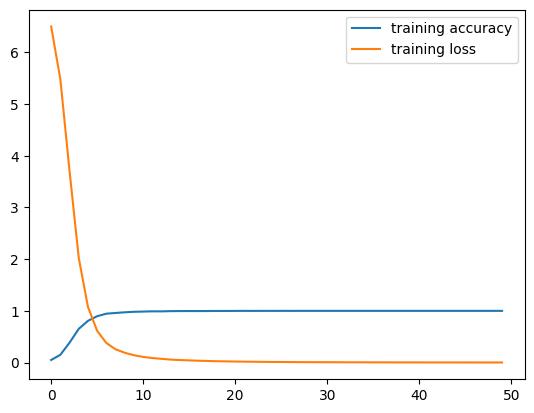

In [54]:
plt.plot(train.history['accuracy'],label='training accuracy')
plt.plot(train.history['loss'],label='training loss')
plt.legend()

In [15]:
model.save('orchid.h5')

In [56]:
import random

while True:
    texts_p = []
    prediction_input = input('You: ')

    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)

    output = model.predict(prediction_input)
    output = output.argmax()

    
    response_tag = le.inverse_transform([output])[0]
    print(response_tag)
    possible_answers = data.loc[data['questionTitle'] == response_tag, 'answerText'].tolist()
    response = random.choice(possible_answers)

    print("Orchid: ", response)

    if response_tag == "goodbye":
        break


You: I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
1/1 [==============================] - 0s 39ms/step


<ipython-input-56-aab03beb4663>:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if prediction_input == 'bye':


i want to become a better man
Chatbot:  The first step for making this sort of change is being motivated to change and it sounds like you have that, so you are already on the right track.As far as learning how to listen, try some of these steps:Ask whether a certain time is a good time for your girlfriend to have an important conversationIf she has a subject that she would like to discuss, consider listening to her as an investigative reporter and asking questions that help you to gain more understanding of her experience. These questions usually begin with words like who, what, where, when. Questions starting with the word why can sometimes make people very uncomfortable because they may not explicitly know why they are asking for something or feeling a certain way. You can try communicating this way for just five minutes or so on until you feel as though you can restate what your girlfriend is saying and have her agree that you are recapturing the essence of what she is trying to com

KeyboardInterrupt: ignored

In [64]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.preprocessing import LabelEncoder
from fuzzywuzzy import process
import random

# Load the dataset
data = pd.read_csv('/content/orchid - 20200325_counsel_chat.csv.csv')

# Convert the questionTitle to numerical labels using LabelEncoder
le = LabelEncoder()
le.fit(data['questionTitle'])
data['label'] = le.transform(data['questionTitle'])

# Tokenize the input data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['questionText'])
vocab_size = len(tokenizer.word_index) + 1

# Pad the input sequences
maxlen = max([len(x.split()) for x in data['questionText']])
x = tokenizer.texts_to_sequences(data['questionText'])
x = pad_sequences(x, padding='post', maxlen=maxlen)

# Define the neural network model
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the neural network
model.fit(x, data['label'], epochs=50)

# Define a function to generate responses from the neural network




Epoch 1/50
67/67 [==============================] - 39s 544ms/step - loss: -1047.9463 - accuracy: 0.0019
Epoch 2/50
67/67 [==============================] - 37s 547ms/step - loss: -3517.7825 - accuracy: 0.0019
Epoch 3/50
67/67 [==============================] - 36s 544ms/step - loss: -4840.8975 - accuracy: 0.0019
Epoch 4/50
67/67 [==============================] - 36s 543ms/step - loss: -5944.7261 - accuracy: 0.0019
Epoch 5/50
67/67 [==============================] - 36s 542ms/step - loss: -6958.5625 - accuracy: 0.0019
Epoch 6/50
67/67 [==============================] - 36s 541ms/step - loss: -7913.8301 - accuracy: 0.0019
Epoch 7/50
67/67 [==============================] - 36s 539ms/step - loss: -8837.2939 - accuracy: 0.0019
Epoch 8/50
67/67 [==============================] - 36s 539ms/step - loss: -9744.3506 - accuracy: 0.0019
Epoch 9/50
67/67 [==============================] - 36s 542ms/step - loss: -10638.2900 - accuracy: 0.0019
Epoch 10/50
67/67 [==============================] - 3

In [69]:
model.save('orchid.h5')

In [70]:
def generate_response(input_text):
    # Find the question in the dataframe that is closest to the input text
    closest_question = process.extractOne(input_text, data['questionText'])[0]
    # Get the corresponding label for the closest question
    label = data.loc[data['questionText'] == closest_question]['label'].values[0]
    # Get a random answer belonging to the corresponding questionTitle
    possible_answers = data.loc[data['label'] == label]['answerText'].values
    response = random.choice(possible_answers)
    return response


# Start the chatbot
print("Welcome to Orchid!")
print("Type 'exit' to end the chatbot.")
while True:
    user_input = input("You: ")
    if user_input in ('hi', 'hey', 'hello', 'greetings', 'help'):
      print("Hello I'm Orchid and I will answer all your mental health related quries. Just ask the question straightaway")
    elif user_input == 'exit':
        print("Chatbot: Goodbye!")
        break
    else:
        response = generate_response(user_input)
        print("Chatbot: ", response)

Welcome to Orchid!
Type 'exit' to end the chatbot.
You: thenks
Chatbot:  I agree with you and this is emotionally painful to watch or be on the receiving side.Depending on who is the person doing this and your relationship to them, it is possible to kindly point out that the person may unnecessarily hurt someone's feelings.If you express your thoughts and give your guidance, then whatever the person does afterwards, you have the peace of knowing you tried to redirect this behavior.
You: exit
Chatbot: Goodbye!


In [ ]:


def generate_response(input_text):
    # Find the question in the dataframe that is closest to the input text
    closest_question = process.extractOne(input_text, data['questionText'])[0]
    # Get the corresponding label for the closest question
    label = data.loc[data['questionText'] == closest_question]['label'].values[0]
    # Get a random answer belonging to the corresponding questionTitle
    possible_answers = data.loc[data['label'] == label]['answerText'].values
    response = random.choice(possible_answers)
    return response


# Start the chatbot
print("Welcome to Orchid!")
print("Type 'exit' to end the chatbot.")
while True:
    user_input = input("You: ")
    if user_input in ('hi', 'hey', 'hello', 'greetings', 'help'):
      print("Hello I'm Orchid and I will answer all your mental health related quries. Just ask the question straightaway")
    elif user_input == 'exit':
        print("Chatbot: Goodbye!")
        break
    else:
        response = generate_response(user_input)
        print("Chatbot: ", response)